<h1 align='center'>iGEM FCB-UANL: FiberEater - Mathematical Modeling</h1>

We believe that a key problem to address today is concerning the pollution caused by the phenomenon of __Fast Fashion__, in which more and more fashion companies generate clothes in larger quantities, in very fast times and this leads to _premature_ replacement of clothing; clothing such as sportswear, for example, contain _polyesters_ that have special characteristics that allow them to be used for a particular purpose, however, these polyesters have a __very long life__, so their degradation in a natural way is null or very complicated. The idea we propose is to create several biological synthetic circuits that allow the __degradation of PET, PTT and Nylon-6__, which are the _most abundant_ polyesters in everyday clothing, and to make a proof of concept of the idea, we formulate the following __mathematical modeling.__

##### Installation of Packages
Before you can initialize the code, you must install the necessary packages for the mathematical modeling, which are installed with the following lines of code, which you must enter in your terminal of the IDE of your interest.

pip install numpy / pip install scipy / pip install matplotlib

##### Import of Packages
For the correct behavior of our mathematical modeling, we must perform the 'call'/import of the packages that are useful for the resolution of 2 important points:

1. Resolution of Ordinary Differential Equations.
2. Graphing of the ODEs resolutions.

For which, we need 3 packages: NumPy (np), SciPy.integrate (odeint), and MatPlotLib.pyplot (plt).


In [1]:
#%% Import Packages
import numpy as np 
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

# ODE 1: Concentration of Vanillic Acid inside the cell.
First, we need to be able to obtain how our inducer will behave in the system, which is __vanillic acid.__ From the inductor will depend the __ignition__ of the circuit, so getting how much concentration of Vanillic Acid is important for our study. To start, we propose 3 different concentrations of Vanilic Acid: _0.01M, 0.1M and 1M_, which we must test to choose the most optimal one.

\begin{align}
\frac{dVan_c}{dt} = \frac{jmVan(Van_o-Van_c)}{V}
\end{align}

#### Define functions to solve the Equation.
For the quick solution of the ODE, variants of the equation are defined, with their respective variables/constants and values, to carry out the solution using the odeint module of the SciPy package. 

In [2]:
#%% ODE1: Concentration of Vanillic Acid inside the cell
def dVancdt001M(Van_c,t):
    jmVan = 4e-21
    Van_o = 0.01
    V = 1.11e-18  #Volumen en m3
    dVancdt001M = (((jmVan)*((Van_o)-(Van_c)))/(V))
    return dVancdt001M

def dVancdt01M(Van_c,t):
   jmVan = 4e-21
   Van_o = 0.1
   V = 1.11e-18  #Volumen en m3
   dVancdt01M = (((jmVan)*((Van_o)-(Van_c)))/(V))
   return dVancdt01M

def dVancdt1M(Van_c,t):
    jmVan = 4e-21
    Van_o = 1
    V = 1.11e-18  #Volumen en m3
    dVancdt1M = (((jmVan)*((Van_o)-(Van_c)))/(V))
    return dVancdt1M

Van_c = 0
t = np.linspace(0, 10800, 10801)

The variables in this equation are: 
* __jmVan:__ Vanilic acid flux constant across the membrane, assumed equal for inward and outward flux (m^3/s).
* __Van_o:__ Vanilic Acid concentration outside the cell (M)
* __V:__ Cell volume (m^3)
* __Van_c:__ Vanilic acid concentration inside the cell (M) [VARIABLE TO BE SOLVED].

#### Solve the Equation.
Through the odeint module, the ODE is solved, following a syntax of: 

odeint('equation', 'variable to be solved', 't')

In [3]:
res_Van_c_1 = odeint(dVancdt001M, Van_c, t)
res_Van_c_2 = odeint(dVancdt01M, Van_c, t)
res_Van_c_3 = odeint(dVancdt1M, Van_c, t)

#### Plotting the ODE resolutions.
Using the MatPlotLib package, the resolutions obtained during 3 hours, 1 solution per second, are plotted.

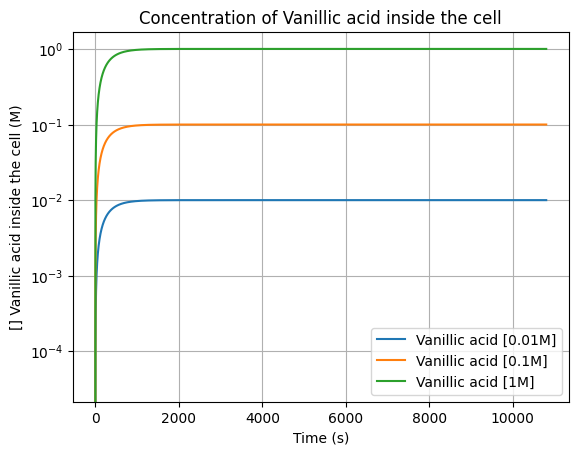

In [5]:
fig,ax = plt.subplots()
ax.plot(t,res_Van_c_1,label='Vanillic acid [0.01M]')
ax.plot(t,res_Van_c_2,label='Vanillic acid [0.1M]')
ax.plot(t,res_Van_c_3,label='Vanillic acid [1M]')
plt.yscale('log')
plt.title("Concentration of Vanillic acid inside the cell")
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('[] Vanillic acid inside the cell (M)')
plt.legend(loc='best')
plt.minorticks_off()
plt.grid(which="both")

__Graph 1.__ _Concentration of Vanillic Acid inside the cell._ The behavior of the inductor concentration depends on the concentration of the inductor, for example, providing our circuit with Vanilic Acid at 1M will allow the Vanilic Acid to be at 1M inside the bacterial cell.

# ODE 2: mRNA levels dependent of the concentration of Vanillic Acid inside the cell.
As a second step, we need to obtain how much __transcript (mRNA)__ is obtained according to the concentration of _vanillinic acid_ inside the cell, which, for reasons of obtaining good results, we selected the _concentration_ that presented the best yield, which is __1M__.

\begin{align}
\frac{dmRNA}{dt} = PoPs*c\frac{Van_c}{K_d+Van_c}-d1*mRNA
\end{align}

#### Define functions to solve the Equation.
For the quick solution of the ODE, variants of the equation are defined, with their respective variables/constants and values, to carry out the solution using the odeint module of the SciPy package. 

In [6]:
#%% ODE2: mRNA levels
def dmRNAPET1dt(mRNA,t):
    PoPs = 0.025
    c = 25
    Van_c1M = 1
    Kd = 1.51e-8
    d1PET = 0.004261
    dmRNAPET1dt = (((PoPs)*((c)*((Van_c1M)/(((Kd)+(Van_c1M)))))-(d1PET*mRNA)))
    return dmRNAPET1dt

def dmRNAMHET1dt(mRNA,t):
    PoPs = 0.025
    c = 25
    Van_c1M = 1
    Kd = 1.51e-8
    d1MHET = 0.005389
    dmRNAMHET1dt = (((PoPs)*((c)*((Van_c1M)/(((Kd)+(Van_c1M)))))-(d1MHET*mRNA)))
    return dmRNAMHET1dt

def dmRNACut1dt(mRNA,t):
    PoPs = 0.025
    c = 25
    Van_c1M = 1
    Kd = 1.51e-8
    d1Cut = 0.006117
    dmRNACut1dt = (((PoPs)*((c)*((Van_c1M)/(((Kd)+(Van_c1M)))))-(d1Cut*mRNA)))
    return dmRNACut1dt

def dmRNANylH1dt(mRNA,t):
    PoPs = 0.025
    c = 25
    Van_c1M = 1
    Kd = 1.51e-8
    d1NylH = 0.0031783
    dmRNANylH1dt = (((PoPs)*((c)*((Van_c1M)/(((Kd)+(Van_c1M)))))-(d1NylH*mRNA)))
    return dmRNANylH1dt

mRNA = 0
t = np.linspace(0, 10800, 10801)

The variables in this equation are:
* __PoPs:__ Transcription Rate (kb/s)
* __c:__ Number of copies of plasmid pSB3K3
* __Van_c1M:__ Maximum concentration of Vanillic Acid obtained from ODE1, with the concentration of [1M] (M)
* __KdFT:__ Dissociation rate of Transcription Factor with Promoter (M)
* __d1(enz):__ Degradation rate of mRNA (kb/s)
* __m:__ Levels of mRNA produced (AU)

#### Solve the Equation.
Through the odeint module, the ODE is solved, following a syntax of: 

odeint('equation', 'variable to be solved', 't')

In [7]:
res_mRNA_PET = odeint(dmRNAPET1dt, mRNA, t)
res_mRNA_MHET = odeint(dmRNAMHET1dt, mRNA, t)
res_mRNA_Cut = odeint(dmRNACut1dt, mRNA, t)
res_mRNA_NylH = odeint(dmRNANylH1dt, mRNA, t)

#### Plotting the ODE resolutions.
Using the MatPlotLib package, the resolutions obtained during 3 hours, 1 solution per second, are plotted.

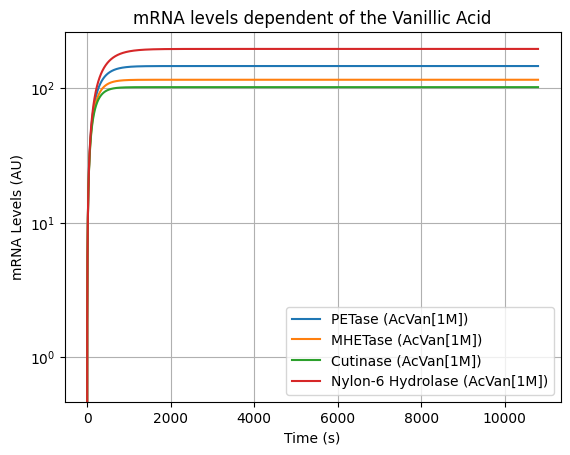

In [9]:
fig,ax = plt.subplots()
ax.plot(t,res_mRNA_PET,label='PETase (AcVan[1M])')
ax.plot(t,res_mRNA_MHET,label='MHETase (AcVan[1M])')
ax.plot(t,res_mRNA_Cut,label='Cutinase (AcVan[1M])')
ax.plot(t,res_mRNA_NylH,label='Nylon-6 Hydrolase (AcVan[1M])')
plt.yscale('log')
plt.title("mRNA levels dependent of the Vanillic Acid")
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('mRNA Levels (AU)')
plt.legend(loc='best')
plt.minorticks_off()
plt.grid(which="both")

__Graph 2.__ _mRNA Levels dependent of the Vanillic Acid concentration inside the cell._ It is predicted that our system will generate mRNA in magnitudes of 10^2, which, in addition to being a positive production, allows us to infer that the enzyme production will also be positive, enough to meet the objective of the project.

# ODE 3: Enzyme levels dependent of the concentration of Vanillic Acid inside the cell.
As a last equation to proceed to perform the calculations for _enzyme activity_, it is necessary to predict the amount of amino acids of each enzyme to be produced, according to the amount of __transcript (mRNA)__ to be produced, obtained from the previous equation.

\begin{align}
\frac{dp}{dt} = k_2*mRNA-d_2*p
\end{align}

#### Define functions to solve the Equation.
For the quick solution of the ODE, variants of the equation are defined, with their respective variables/constants and values, to carry out the solution using the odeint module of the SciPy package. 

In [10]:
#%% ODE3: Translation of the enzymes dependent mRNA produced
def dpPETdt(p,t):
    k2 = 15
    mRNAPET = 146.6791811
    d2 = 5e-4
    dpPETdt = ((k2*mRNAPET)-(d2*p))
    return dpPETdt

def dpMHETdt(p,t):
    k2 = 15
    mRNAMHET = 115.9769884
    d2 = 5e-4
    dpMHETdt = ((k2*mRNAMHET)-(d2*p))
    return dpMHETdt

def dpCUTdt(p,t):
    k2 = 15
    mRNACUT = 102.1742669
    d2 = 5e-4
    dpCUTdt = ((k2*mRNACUT)-(d2*p))
    return dpCUTdt

def dpNYLdt(p,t):
    k2 = 15
    mRNANYL = 196.6460028
    d2 = 5e-4
    dpNYLdt = ((k2*mRNANYL)-(d2*p))
    return dpNYLdt

p = 0
t = np.linspace(0, 10800, 10801)

The variables in this equation are:
* __k2:__ Translation rate of _E. coli_ (aa/s)
* __m:__ mRNA levels of the enzyme (AU)
* __d2:__ Protein degradation rate (1/sec)
* __p:__ Translated protein of each enzyme depending on the mRNA production (aa)

#### Solve the Equation.
Through the odeint module, the ODE is solved, following a syntax of: 

odeint('equation', 'variable to be solved', 't')

In [11]:
res_p_PET = odeint(dpPETdt, p, t)
res_p_MHET = odeint(dpMHETdt, p, t)
res_p_CUT = odeint(dpCUTdt, p, t)
res_p_NYL = odeint(dpNYLdt, p, t)

#### Plotting the ODE resolutions.
Using the MatPlotLib package, the resolutions obtained during 3 hours, 1 solution per second, are plotted.

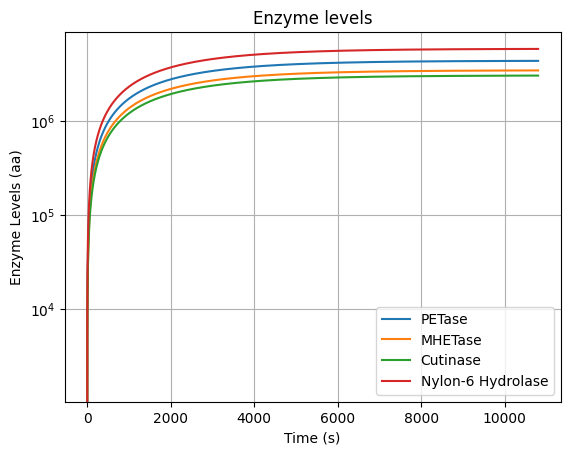

In [13]:
fig,ax = plt.subplots()
ax.plot(t,res_p_PET,label='PETase')
ax.plot(t,res_p_MHET,label='MHETase')
ax.plot(t,res_p_CUT,label='Cutinase')
ax.plot(t,res_p_NYL,label='Nylon-6 Hydrolase')
plt.yscale('log')
plt.title("Enzyme levels")
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Enzyme Levels (aa)')
plt.legend(loc='best')
plt.minorticks_off()
plt.grid(which="both")

__Graph 3.__ _Enzyme Levels dependent of the mRNA produced._ In a positive way and in order to achieve the main objective, which is a good enzyme production with a good enzymatic activity, we predict an amino acid production of each enzyme in a magnitude of 10^6, which is an adequate quantity for the project, and which allows us to infer that its catalytic activity will be good.

# Calculation to measure the Enzyme Concentration inside the Cell.
Before calculating the enzyme activity and given that we only obtained the amount in the ODEs, we must first obtain the concentration of the enzymes inside the bacterial cell.

\begin{align}
[Protein] = (pg\frac{aap/aaenz}{(PM)})/VolEColi
\end{align}

In [1]:
#%% Calculation to measure the Enzyme Concentration inside the Cell
#PETase
pgPET = 4.697e-20
aapPET = 4380500.775
aaPET = 268
PMPET = 28290
VolEColi = 1.11e-15
ptPET = ((pgPET)*((aapPET)/(aaPET))/(PMPET))/(VolEColi)
print(f'Enzyme Concentration of PETase in 3hrs. = {ptPET} M')

#MHETase
pgMHET = 1.11e-19
aapMHET = 3463595.064
aaMHET = 635
PMMHET = 67020
VolEColi = 1.11e-15
ptMHET = ((pgMHET)*((aapMHET)/(aaMHET))/(PMMHET))/(VolEColi)
print(f'Enzyme Concentration of MHETase in 3hrs = {ptMHET} M')

#Cutinase
pgCut = 5.35e-20
aapCut = 3051383.652
aaCut = 301
PMCut = 32220
VolEColi = 1.11e-15
ptCut = ((pgCut)*((aapCut)/(aaCut))/(PMCut))/(VolEColi)
print(f'Enzyme Concentration of Cutinase in 3hrs = {ptCut} M')

#Nylon-6 Hidrolase
pgNylH = 7.082e-20
aapNylH = 5872735.046
aaNylH = 392
PMNylH = 42650
VolEColi = 1.11e-15
ptNylH = ((pgNylH)*((aapNylH)/(aaNylH))/(PMNylH))/(VolEColi)
print(f'Enzyme Concentration of Nylon-6 Hidrolase in 3hrs = {ptNylH} M')

Enzyme Concentration of PETase in 3hrs. = 2.4448577833672055e-05 M
Enzyme Concentration of MHETase in 3hrs = 8.138586117200881e-06 M
Enzyme Concentration of Cutinase in 3hrs = 1.5164761578705972e-05 M
Enzyme Concentration of Nylon-6 Hidrolase in 3hrs = 2.2411361906320273e-05 M


It can be observed that the concentrations are relatively low, however, they are not low enough to show poor or inefficient enzyme activity. The concentrations are in the magnitudes of 10^-6 to 10^-5.

# Calculations to obtain the enzyme activity of each enzyme in the circuit.
To finalize the mathematical modeling, the enzyme activity of each enzyme is obtained, to have a clearer and broader picture of how the system will behave and to identify areas of opportunity to optimize the circuits.

\begin{align}
\frac{d(pol)}{dt} = {Kcat*[pt]*[Van]_c} / {Km+[Van]_c}
\end{align}

In [2]:
#%% Calculations to obtain the Enzyme Activity of each enzyme in the circuit
#PETase
KcatPET = 27
ptPET = 2.4448577833672055e-05
Van_c = 1
KmPET = 0.0046
enzPET = (((KcatPET)*(ptPET)*(Van_c))/((KmPET)+(Van_c)))
print(f'Enzyme Activity of PETase in 3hr = {enzPET} M/s')

#MHETase
KcatMHET = 27.6
ptMHET = 8.138586117200881e-06
Van_c = 1
KmMHET = 2.317e-5
enzMHET = (((KcatMHET)*(ptMHET)*(Van_c))/((KmMHET)+(Van_c)))
print(f'Enzyme Activity of MHETase in 3hr = {enzMHET} M/s')

#Cutinase
KcatCut = 742
ptCut = 1.5164761578705972e-05
Van_c = 1
KmCut = 0.000505
enzCut = (((KcatCut)*(ptCut)*(Van_c))/((KmCut)+(Van_c)))
print(f'Enzyme Activity of Cutinase in 3hr = {enzCut} M/s')

#Nylon-6 Hidrolase
KcatNylH = 19
ptNylH = 2.2411361906320273e-05
Van_c = 1
KmNylH = 0.015
enzNylH = (((KcatNylH)*(ptNylH)*(Van_c))/((KmNylH)+(Van_c)))
print(f'Enzyme Activity of Nylon-6 Hidrolase in 3hr = {enzNylH} M/s')

Enzyme Activity of PETase in 3hr = 0.0006570889921452772 M/s
Enzyme Activity of MHETase in 3hr = 0.00022461977239461798 M/s
Enzyme Activity of Cutinase in 3hr = 0.0112465735717461 M/s
Enzyme Activity of Nylon-6 Hidrolase in 3hr = 0.00041952303075870465 M/s


To finalize our mathematical modeling, we conclude that the most efficient enzymes based on their catalytic activity are:
1. __Cutinase__, with enzyme activity of 0.0112465735717461 M/s.
2. __PETase__, with enzyme activity of 0.0006570889921452772 M/s.
3. __Nylon-6 Hidrolase__, with enzyme activity of 0.00041952303075870465 M/s.
4. __MHETase__, with enzyme activity of 0.00022461977239461798 M/s.